In [ ]:
import os
import numpy as np
import functools

data = "/content/drive/MyDrive/Academic/Course Work/Masters YorkU/Fall 2023-24/EECS 6154 - DIP Theory and Algorithms/Project"
images = [im for im in os.listdir(data) if 'jpeg' in im]
# images
exd = "/content/drive/MyDrive/Academic/Course Work/Masters YorkU/Fall 2023-24/EECS 6154 - DIP Theory and Algorithms/Project/ExDark"
cont = os.listdir(exd)
test = "/content/drive/MyDrive/Academic/Course Work/Masters YorkU/Fall 2023-24/EECS 6154 - DIP Theory and Algorithms/Project/1.png"

In [ ]:
obj_dct = {}
for obj in cont:
  obj_dct[obj] = [os.path.join(exd, obj, val) for val in os.listdir(os.path.join(exd, obj))]
  print(obj_dct[obj])

['/content/drive/MyDrive/Academic/Course Work/Masters YorkU/Fall 2023-24/EECS 6154 - DIP Theory and Algorithms/Project/ExDark/Boat/2015_01303.jpg', '/content/drive/MyDrive/Academic/Course Work/Masters YorkU/Fall 2023-24/EECS 6154 - DIP Theory and Algorithms/Project/ExDark/Boat/2015_00747.jpg', '/content/drive/MyDrive/Academic/Course Work/Masters YorkU/Fall 2023-24/EECS 6154 - DIP Theory and Algorithms/Project/ExDark/Boat/2015_00960.jpg', '/content/drive/MyDrive/Academic/Course Work/Masters YorkU/Fall 2023-24/EECS 6154 - DIP Theory and Algorithms/Project/ExDark/Boat/2015_00753.jpg', '/content/drive/MyDrive/Academic/Course Work/Masters YorkU/Fall 2023-24/EECS 6154 - DIP Theory and Algorithms/Project/ExDark/Boat/2015_00790.jpg', '/content/drive/MyDrive/Academic/Course Work/Masters YorkU/Fall 2023-24/EECS 6154 - DIP Theory and Algorithms/Project/ExDark/Boat/2015_00974.jpg', '/content/drive/MyDrive/Academic/Course Work/Masters YorkU/Fall 2023-24/EECS 6154 - DIP Theory and Algorithms/Project

In [ ]:
import numpy as np
from scipy.sparse import eye, spdiags, kron, vstack
from scipy.sparse.linalg import factorized, splu
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2


# def solve_prox_tv_admm(X, Y, div, delta, rho=5, numIterations=100):
#     """
#     Solves the proximal operator of the TV norm using ADMM.

#     Arguments:
#     X -- Optimization vector (initialization of the iterative process).
#     Y -- Measurements vector (known data).
#     div -- difference matrix.
#     delta -- L1 regularization parameter.
#     rho -- The rho parameter for ADMM.
#     numIterations -- Number of iterations for the algorithm.

#     Returns:
#     X -- Optimized vector after ADMM iterations.
#     mX -- History of X over iterations.
#     """
#     mX = np.zeros((len(Y), numIterations))
#     I = eye(len(Y))
#     mC = factorized(I + rho * (div.T @ div))  # Cholesky decomposition
#     # mC = splu((I + delta * (div.T @ div)).tocsc()).solve

#     Z = prox_l1(div @ X, delta / rho)
#     # Z = soft_thresholding(div @ X, delta / rho)
#     lmda = div @ X - Z
#     # lmda = rho * (div @ X - Z)
#     mX[:, 0] = X

#     for i in range(1, numIterations):
#         X = mC(Y + (div.T @ (delta * Z - lmda)))
#         Z = prox_l1(div @ X + lmda, delta / rho)
#         # lmda = lmda + rho * (div @ X - Z)
#         lmda = lmda + (div @ X - Z)
#         mX[:, i] = X

#     return X, mX


# def solve_prox_tv_admm(X, Y, div, delta, rho=5, numIterations=100):
#     """
#     Solves the proximal operator of the TV norm using ADMM.

#     Arguments:
#     X -- Optimization vector (initialization of the iterative process).
#     Y -- Measurements vector (known data).
#     div -- difference matrix.
#     delta -- L1 regularization parameter.
#     rho -- The rho parameter for ADMM.
#     numIterations -- Number of iterations for the algorithm.

#     Returns:
#     X -- Optimized vector after ADMM iterations.
#     mX -- History of X over iterations.
#     """

#     numRows, numCols = 400, 600
#     mX = np.zeros((len(Y), numIterations))
#     I = eye(len(Y))
#     mC = factorized(I + rho * (div.T @ div))  # Cholesky decomposition

#     Z = prox_l1(div @ X, delta / rho)
#     lmda = div @ X - Z
#     mX[:, 0] = X

#     for i in range(1, numIterations):
#         X = mC(Y + (rho * div.T @ (Z - lmda)))
#         plt.imshow(np.reshape(X, (numRows, numCols)))
#         plt.show()
#         Z = prox_l1(div @ X + lmda, delta / rho)
#         lmda = lmda + div @ X - Z
#         mX[:, i] = X

#     return X, mX


def solve_prox_tv_admm(vX, vY, mD, paramLambda, paramRho=5, numIterations=100):
    """
    Solves the Prox of the Total Variation (TV) Norm using ADMM Method.
    Args:
    - vX (ndarray): Optimization Vector (n x 1).
    - vY (ndarray): Measurements Vector (n x 1).
    - mD (ndarray): Model Matrix (m x n).
    - paramLambda (float): L1 Regularization parameter.
    - paramRho (float): The Rho Parameter for ADMM.
    - numIterations (int): Number of iterations.

    Returns:
    - vX (ndarray): Output Vector (n x 1).
    - mX (ndarray): Matrix to store vX at each iteration.
    """

    mX = np.zeros((vY.shape[0], numIterations))

    mI = eye(vY.shape[0])
    mC = splu((mI + paramRho * (mD.T @ mD)).tocsc()).solve  # Pre-factorize for efficiency

    vZ = prox_l1(mD @ vX, paramLambda / paramRho)
    vU = mD @ vX - vZ

    mX[:, 0] = vX

    for ii in range(1, numIterations):
        vX = mC(vY + (paramRho * mD.T @ (vZ - vU)))
        vZ = prox_l1(mD @ vX + vU, paramLambda / paramRho)
        vU = vU + mD @ vX - vZ

        mX[:, ii] = vX

    return vX, mX


def prox_l1(v, lambda_param):
    """Proximal operator for L1 norm."""
    return np.sign(v) * np.maximum(np.abs(v) - lambda_param, 0)


# def prox_l1(X, lambdaFactor):
#     """
#     Soft thresholding operation for L1 norm.

#     Arguments:
#     X -- Input vector.
#     lambdaFactor -- Lambda factor for thresholding.

#     Returns:
#     X -- Thresholded vector.
#     """
#     return np.maximum(X - lambdaFactor, 0) + np.minimum(X + lambdaFactor, 0)

def create_gradient_operator(num_rows, num_cols):
    """
    Generates a convolution matrix for the 2D gradient operation.

    Arguments:
    num_rows -- Number of rows of the image to be convolved.
    num_cols -- Number of columns of the image to be convolved.

    Returns:
    div -- Convolution matrix for the 2D gradient operation.
    """

    # # Vertical Gradient Operator
    # mT_v = sp.diags([np.ones(num_rows - 1), -np.ones(num_rows - 1)], [0, 1], shape=(num_rows - 1, num_rows))
    # divv = sp.kron(sp.eye(num_cols), mT_v)

    # # Horizontal Gradient Operator
    # mT_h = sp.diags([np.ones(num_cols - 1), -np.ones(num_cols - 1)], [0, 1], shape=(num_cols - 1, num_cols))
    # divh = sp.kron(mT_h, sp.eye(num_rows))

    # # Combined Gradient Operator
    # div = sp.vstack([divv, divh])

    # return div
    # Vertical Operator - T(numRows)
    diagonals_v = [np.ones(numRows - 1), -np.ones(numRows - 1)]
    mT_v = spdiags(diagonals_v, [0, 1], numRows - 1, numRows)
    mDv = kron(np.eye(numCols), mT_v)

    # Horizontal Operator - T(numCols)
    diagonals_h = [np.ones(numCols - 1), -np.ones(numCols - 1)]
    mT_h = spdiags(diagonals_h, [0, 1], numCols - 1, numCols)
    mDh = kron(mT_h, np.eye(numRows))

    # Combine both operators
    mD = vstack([mDv, mDh])

    return mD



# Placeholder for Retinex decomposition
def estimate_illumination_map(image):
    # Use np.max with axis=2 to find the maximum across the color channels (R, G, B)
    illumination_map = np.max(image, axis=2)
    return illumination_map

def estimate_reflectance(image, illumination_map):
    # Avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        reflectance = image / illumination_map[:,:,None]
        reflectance[~np.isfinite(reflectance)] = 0  # Replace infinities and NaNs with 0
    return reflectance

# TV-ADMM denoising (using skimage's denoise_tv_chambolle as a placeholder)
# def tv_admm_denoising(reflectance, weight=0.2):
#     denoised = np.zeros_like(reflectance)
#     for i in range(reflectance.shape[2]):  # Apply denoising channel-wise
#         denoised[:, :, i] = denoise_tv_chambolle(reflectance[:, :, i], weight=weight, multichannel=False)
#     return denoised

# Tikhonov regularization for illumination enhancement
# def enhance_illumination(illumination, lambda_reg=1.0, num_iter=100, learning_rate=0.01):
#     enhanced_illumination = np.copy(illumination)

#     for _ in range(num_iter):
#         grad = 2 * (enhanced_illumination - illumination)  # Data fidelity term
#         grad += 2 * lambda_reg * gaussian_filter(enhanced_illumination, sigma=2, order=2)  # Regularization term
#         enhanced_illumination -= learning_rate * grad

#     return enhanced_illumination

def enhance_illumination(image):
    # # Convert to float and normalize
    # image_float = image.astype(np.float32) / 255.0

    # # Estimate illumination map
    # illumination_map = estimate_illumination_map(image_float)

    # Apply histogram equalization to the illumination map
    # Convert to 8-bit for histogram equalization
    illumination_map_8bit = (image * 255).astype(np.uint8)
    # equalized_illumination = cv2.equalizeHist(illumination_map_8bit) / 255.0
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    equalized_illumination = clahe.apply(illumination_map_8bit) / 255.0

    # # Recombine with the reflectance component
    # enhanced_image = np.zeros_like(image_float)
    # for i in range(3):  # For each color channel
    #     enhanced_image[:, :, i] = image_float[:, :, i] / illumination_map * equalized_illumination

    return equalized_illumination


def apply_gamma_correction(image, gamma=1.5):
    # Apply gamma correction
    gamma_corrected = np.power(image, gamma)
    return gamma_corrected


mI: (400, 600, 3), mY: (400, 600, 3)


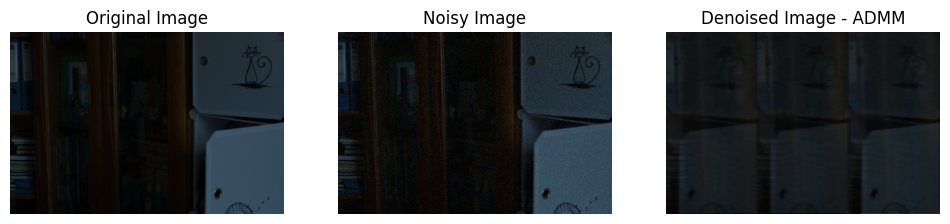

In [ ]:
# Replace 'Lena256.png' with the path to your color image file
image_path = test
# Load the image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to float32 for more precision in calculations
mI = np.float32(image_rgb) / 255.0

# Add noise to each color channel
noise_std = 10 / 255
numRows, numCols, numChannels = mI.shape
mY = mI + (noise_std * np.random.randn(numRows, numCols, numChannels))

# Initialize variables for optimization
delta = 0.025
numIterations = 250

print(f"mI: {mI.shape}, mY: {mY.shape}")

# Denoising each color channel separately
denoised_image = np.zeros_like(mI)
for channel in range(numChannels):
  Y = mY[:, :, channel].flatten()
  XInit = np.zeros(numRows * numCols)
  div = create_gradient_operator(numRows, numCols)
  X_admm, mX = solve_prox_tv_admm(XInit, Y, div, delta, numIterations)
  denoised_image[:, :, channel] = X_admm.reshape(numRows, numCols)

# Displaying results
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(mI)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mY)
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image)
plt.title('Denoised Image - ADMM')
plt.axis('off')
plt.show()

In [ ]:
def slice_at_axis(sl, axis):
    """
    Construct tuple of slices to slice an array in the given dimension.

    Parameters
    ----------
    sl : slice
        The slice for the given dimension.
    axis : int
        The axis to which `sl` is applied. All other dimensions are left
        "unsliced".

    Returns
    -------
    sl : tuple of slices
        A tuple with slices matching `shape` in length.

    Examples
    --------
    >>> slice_at_axis(slice(None, 3, -1), 1)
    (slice(None, None, None), slice(None, 3, -1), Ellipsis)
    """
    return (slice(None),) * axis + (sl,) + (...,)

def _denoise_tv_chambolle_nd(image, weight=0.1, eps=2.e-4, max_num_iter=200):
    """Perform total-variation denoising on n-dimensional images.

    Parameters
    ----------
    image : ndarray
        n-D input data to be denoised.
    weight : float, optional
        Denoising weight. The greater `weight`, the more denoising (at
        the expense of fidelity to `input`).
    eps : float, optional
        Relative difference of the value of the cost function that determines
        the stop criterion. The algorithm stops when:

            (E_(n-1) - E_n) < eps * E_0

    max_num_iter : int, optional
        Maximal number of iterations used for the optimization.

    Returns
    -------
    out : ndarray
        Denoised array of floats.

    Notes
    -----
    Rudin, Osher and Fatemi algorithm.
    """

    ndim = image.ndim
    p = np.zeros((image.ndim, ) + image.shape, dtype=image.dtype)
    g = np.zeros_like(p)
    d = np.zeros_like(image)
    i = 0
    while i < max_num_iter:
        if i > 0:
            # d will be the (negative) divergence of p
            d = -p.sum(0)
            slices_d = [slice(None), ] * ndim
            slices_p = [slice(None), ] * (ndim + 1)
            for ax in range(ndim):
                slices_d[ax] = slice(1, None)
                slices_p[ax+1] = slice(0, -1)
                slices_p[0] = ax
                d[tuple(slices_d)] += p[tuple(slices_p)]
                slices_d[ax] = slice(None)
                slices_p[ax+1] = slice(None)
            out = image + d
        else:
            out = image
        E = (d ** 2).sum()

        # g stores the gradients of out along each axis
        # e.g. g[0] is the first order finite difference along axis 0
        slices_g = [slice(None), ] * (ndim + 1)
        for ax in range(ndim):
            slices_g[ax+1] = slice(0, -1)
            slices_g[0] = ax
            g[tuple(slices_g)] = np.diff(out, axis=ax)
            slices_g[ax+1] = slice(None)

        norm = np.sqrt((g ** 2).sum(axis=0))[np.newaxis, ...]
        E += weight * norm.sum()
        tau = 1. / (2.*ndim)
        norm *= tau / weight
        norm += 1.
        p -= tau * g
        p /= norm
        E /= float(image.size)
        if i == 0:
            E_init = E
            E_previous = E
        else:
            if np.abs(E_previous - E) < eps * E_init:
                break
            else:
                E_previous = E
        i += 1
    return out


def denoise_tv_chambolle(image, weight=0.1, eps=2.e-4, max_num_iter=200,
                         *, channel_axis=None):
    r"""Perform total variation denoising in nD.

    Given :math:`f`, a noisy image (input data),
    total variation denoising (also known as total variation regularization)
    aims to find an image :math:`u` with less total variation than :math:`f`,
    under the constraint that :math:`u` remain similar to :math:`f`.
    This can be expressed by the Rudin--Osher--Fatemi (ROF) minimization
    problem:

    .. math::

        \min_{u} \sum_{i=0}^{N-1} \left( \left| \nabla{u_i} \right| + \frac{\lambda}{2}(f_i - u_i)^2 \right)

    where :math:`\lambda` is a positive parameter.
    The first term of this cost function is the total variation;
    the second term represents data fidelity. As :math:`\lambda \to 0`,
    the total variation term dominates, forcing the solution to have smaller
    total variation, at the expense of looking less like the input data.

    This code is an implementation of the algorithm proposed by Chambolle
    in [1]_ to solve the ROF problem.

    Parameters
    ----------
    image : ndarray
        Input image to be denoised. If its dtype is not float, it gets
        converted with :func:`~.img_as_float`.
    weight : float, optional
        Denoising weight. It is equal to :math:`\frac{1}{\lambda}`. Therefore,
        the greater the `weight`, the more denoising (at the expense of
        fidelity to `image`).
    eps : float, optional
        Tolerance :math:`\varepsilon > 0` for the stop criterion (compares to
        absolute value of relative difference of the cost function :math:`E`):
        The algorithm stops when :math:`|E_{n-1} - E_n| < \varepsilon * E_0`.
    max_num_iter : int, optional
        Maximal number of iterations used for the optimization.
    channel_axis : int or None, optional
        If ``None``, the image is assumed to be grayscale (single-channel).
        Otherwise, this parameter indicates which axis of the array corresponds
        to channels.

        .. versionadded:: 0.19
           ``channel_axis`` was added in 0.19.

    Returns
    -------
    u : ndarray
        Denoised image.

    Notes
    -----
    Make sure to set the `channel_axis` parameter appropriately for color
    images.

    The principle of total variation denoising is explained in [2]_.
    It is about minimizing the total variation of an image,
    which can be roughly described as
    the integral of the norm of the image gradient. Total variation
    denoising tends to produce cartoon-like images, that is,
    piecewise-constant images.

    See Also
    --------
    denoise_tv_bregman : Perform total variation denoising using split-Bregman
        optimization.

    References
    ----------
    .. [1] A. Chambolle, An algorithm for total variation minimization and
           applications, Journal of Mathematical Imaging and Vision,
           Springer, 2004, 20, 89-97.
    .. [2] https://en.wikipedia.org/wiki/Total_variation_denoising

    Examples
    --------
    2D example on astronaut image:

    >>> from skimage import color, data
    >>> img = color.rgb2gray(data.astronaut())[:50, :50]
    >>> rng = np.random.default_rng()
    >>> img += 0.5 * img.std() * rng.standard_normal(img.shape)
    >>> denoised_img = denoise_tv_chambolle(img, weight=60)

    3D example on synthetic data:

    >>> x, y, z = np.ogrid[0:20, 0:20, 0:20]
    >>> mask = (x - 22)**2 + (y - 20)**2 + (z - 17)**2 < 8**2
    >>> mask = mask.astype(float)
    >>> rng = np.random.default_rng()
    >>> mask += 0.2 * rng.standard_normal(mask.shape)
    >>> res = denoise_tv_chambolle(mask, weight=100)

    """

    # im_type = image.dtype
    # if not im_type.kind == 'f':
    #     # image = img_as_float(image)
    #     image = np.float32(image) / 255.0

    # enforce float16->float32 and float128->float64
    # float_dtype = _supported_float_type(image.dtype)
    # image = image.astype(float_dtype, copy=False)

    if channel_axis is not None:
        channel_axis = channel_axis % image.ndim
        _at = functools.partial(slice_at_axis, axis=channel_axis)
        out = np.zeros_like(image)
        for c in range(image.shape[channel_axis]):
            out[_at(c)] = _denoise_tv_chambolle_nd(image[_at(c)], weight, eps,
                                                   max_num_iter)
    else:
        out = _denoise_tv_chambolle_nd(image, weight, eps, max_num_iter)
    return out

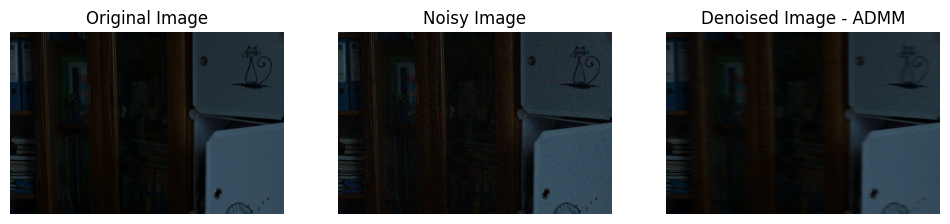

In [ ]:
# Replace 'Lena256.png' with the path to your color image file
image_path = test
# Load the image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to float32 for more precision in calculations
mI = np.float32(image_rgb) / 255.0

# Add noise to each color channel
noise_std = 10 / 255
numRows, numCols, numChannels = mI.shape
mY = mI + (noise_std * np.random.randn(numRows, numCols, numChannels))

# Initialize variables for optimization
delta = 0.02
numIterations = 250

# Denoising each color channel separately
denoised_image = np.zeros_like(mI)

denoised = np.zeros_like(denoised_image)
for i in range(mY.shape[2]):  # Apply denoising channel-wise
    denoised_image[:, :, i] = denoise_tv_chambolle(mY[:, :, i], weight=0.2, channel_axis=2)

# Displaying results
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(mI)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mY)
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image)
plt.title('Denoised Image - ADMM')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def compute_gradient(image):
    """Compute the gradient of the image."""
    grad_x = np.roll(image, -1, axis=1) - image
    grad_y = np.roll(image, -1, axis=0) - image

    print(f"shape: {np.stack([grad_x, grad_y], axis=-1).shape}")
    return np.stack([grad_x, grad_y], axis=-1)

def compute_divergence(grad_image):
    """Compute the divergence of the gradient image."""
    div_x = np.roll(grad_image[..., 0], -1, axis=1) - grad_image[..., 0]
    div_y = np.roll(grad_image[..., 1], -1, axis=0) - grad_image[..., 1]
    return div_x + div_y

def soft_thresholding(z, threshold):
    """Apply soft thresholding for L1 norm."""
    return np.sign(z) * np.maximum(np.abs(z) - threshold, 0)

def admm_optimize(y, mu, rho, max_iter=100, tol=1e-3):
    """ADMM optimization for image denoising."""
    x = np.copy(y)
    z = compute_gradient(x)
    lambda_ = np.zeros_like(z)

    for i in range(max_iter):
        # Update x
        x = np.linalg.inv(np.eye(y.shape[0]) + rho * compute_divergence(compute_divergence(x))) @ (y + compute_divergence(rho * z - lambda_))

        # Update z
        grad_x = compute_gradient(x)
        z = soft_thresholding(grad_x + lambda_ / rho, 1 / rho)

        # Update lambda
        lambda_ += rho * (grad_x - z)

        # Check for convergence (optional)
        if np.linalg.norm(grad_x - z) < tol:
            break

    return x

# Apply the optimization to each channel
def process_rgb_image(image_data, mu, rho):
    optimized_channels = []
    for i in range(3):  # RGB channels
        channel = image_data[:, :, i]
        optimized_channel = admm_optimize(channel, mu, rho)
        optimized_channels.append(optimized_channel)

    return np.stack(optimized_channels, axis=-1)


image_path = test
# Load the image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_rgb = cv2.resize(image_rgb, (image_rgb.shape[0], image_rgb.shape[0]),
               interpolation = cv2.INTER_LINEAR)
# Convert image to float32 for more precision in calculations
mI = np.float32(image_rgb) / 255.0
# Add noise to each color channel
noise_std = 10 / 255
numRows, numCols, numChannels = mI.shape
mY = mI + (noise_std * np.random.randn(numRows, numCols, numChannels))

print(f"mI: {mI.shape}, mY: {mY.shape}")
optimized_image = process_rgb_image(mY, mu=0.1, rho=0.5)

# Displaying results
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(mI)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mY)
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(optimized_image)
plt.title('Denoised Image - ADMM')
plt.axis('off')
plt.show()

mI: (400, 400, 3), mY: (400, 400, 3)
shape: (400, 400, 2)


AxisError: ignored